In [1]:
from PINN_model import PINN
import utils.helper_functions_PINN as hf_PINN
import utils.helper_functions as hf
import utils.fun as fun
import numpy as np
import torch
import matplotlib.pyplot as plt

In [5]:
from PINN_model import PINN

N_colloc = 21
filename = 'in_silico_dataset.csv'
hidden_layers = [128, 128, 128]

# pinn = PINN(N_colloc, filename, hidden_layers)
# pinn.create_model()
# pinn.pre_training(epochs=40, lr=1e-3, data_loss_batch=64)
pinn.training(epochs=25, lr=5e-4, ode_loss_batch=10, bc_loss_batch=32, balancing_scheme='softadapt', alpha=0.5, tau=5)


Updated Parameters with Excel
Start of PINN model training.
Loss balancing scheme: softadapt
[PINN] Epoch 00001/00025, total=4.854e+01 | data=7.330e-02 | bc=3.262e-01 | ode=1.743e+01 | LR=5.0e-04 | λ=[1.10,0.95,0.86,0.99,0.32,2.32,0.45]
[PINN] Epoch 00002/00025, total=4.372e+01 | data=7.287e-02 | bc=3.377e-01 | ode=1.612e+01 | LR=5.0e-04 | λ=[0.33,0.33,0.66,0.38,0.44,4.54,0.32]
[PINN] Epoch 00003/00025, total=5.299e+01 | data=7.251e-02 | bc=5.290e-01 | ode=1.561e+01 | LR=5.0e-04 | λ=[0.75,0.81,0.73,0.72,0.54,2.94,0.52]
[PINN] Epoch 00004/00025, total=4.115e+01 | data=7.242e-02 | bc=2.451e-01 | ode=1.444e+01 | LR=5.0e-04 | λ=[0.48,0.48,0.57,0.63,2.40,1.63,0.81]
[PINN] Epoch 00005/00025, total=2.471e+01 | data=7.239e-02 | bc=1.884e-01 | ode=9.363e+00 | LR=5.0e-04 | λ=[0.51,0.51,0.52,0.49,0.05,4.45,0.49]
[PINN] Epoch 00006/00025, total=3.493e+01 | data=7.071e-02 | bc=1.685e-01 | ode=1.128e+01 | LR=5.0e-04 | λ=[0.73,0.59,1.05,0.78,2.71,0.36,0.79]
[PINN] Epoch 00007/00025, total=3.576e+01 

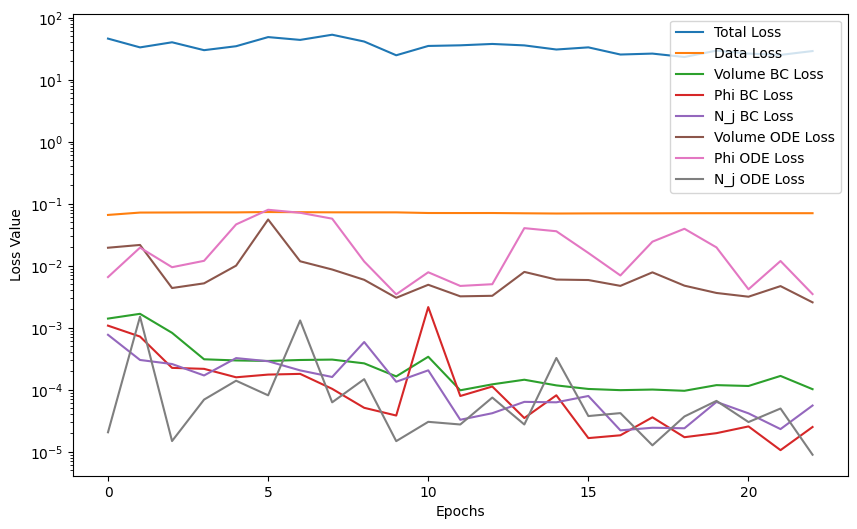

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 6))
loss_vector = np.array(pinn.losses_vector)
plt.plot(loss_vector[:, 0], label='Total Loss')
plt.plot(loss_vector[:, 1], label='Data Loss')
plt.plot(loss_vector[:, 2], label='Volume BC Loss')
plt.plot(loss_vector[:, 3], label='Phi BC Loss')
plt.plot(loss_vector[:, 4], label='N_j BC Loss')
plt.plot(loss_vector[:, 5], label='Volume ODE Loss')
plt.plot(loss_vector[:, 6], label='Phi ODE Loss')
plt.plot(loss_vector[:, 7], label='N_j ODE Loss')
plt.yscale('log')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.show()

In [13]:
import torch
torch.save(pinn.model.state_dict(), "PINN_softadapt.pt")


In [2]:
N_colloc = 21
filename = 'in_silico_dataset.csv'
data_loss_batch = 32
hidden_layers = [128, 128, 128]

dnn = PINN(N_colloc, filename, hidden_layers)
dnn.create_model()

dnn.model.load_state_dict(torch.load("DNN.pt"))
dnn.model.eval()  # Set to evaluation mode


pinn = PINN(N_colloc, filename, hidden_layers)
pinn.create_model()

pinn.model.load_state_dict(torch.load("PINN_softadapt.pt"))
pinn.model.eval()  # Set to evaluation mode


DNN model created succesfully. Structure:  [4, 128, 128, 128, 23] 



C:\Users\iagr9\AppData\Local\Temp\ipykernel_50296\1399678337.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dnn.model.load_state_dict(torch.load("DNN.pt"))



DNN model created succesfully. Structure:  [4, 128, 128, 128, 23] 



C:\Users\iagr9\AppData\Local\Temp\ipykernel_50296\1399678337.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pinn.model.load_state_dict(torch.load("PINN_softadapt.pt"))

DNN(
  (net): Sequential(
    (layer0): Linear(in_features=4, out_features=128, bias=True)
    (tanh0): Tanh()
    (layer1): Linear(in_features=128, out_features=128, bias=True)
    (tanh1): Tanh()
    (layer2): Linear(in_features=128, out_features=128, bias=True)
    (tanh2): Tanh()
    (layer3): Linear(in_features=128, out_features=23, bias=True)
    (sigmoid): Sigmoid()
  )
)

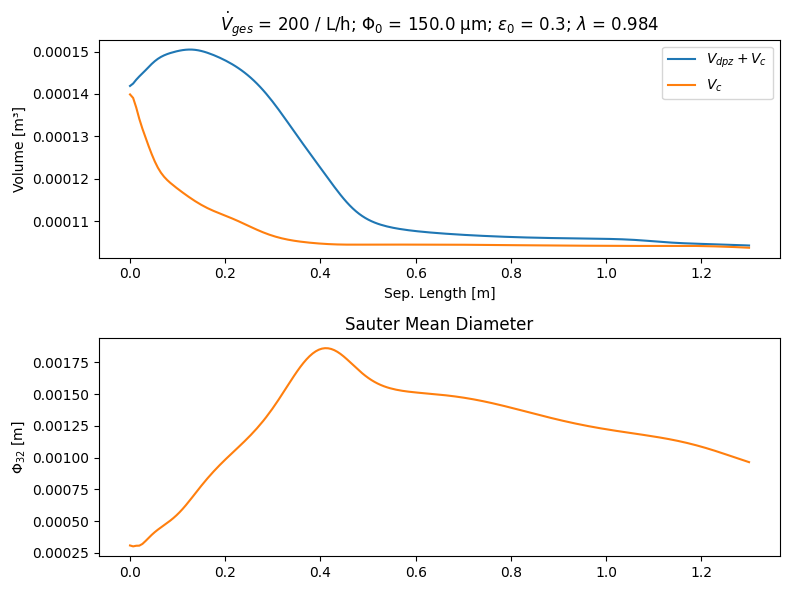

In [35]:
# vector x
dV_ges = 200
eps_0 = 0.3
phi_0 = 150e-6
_, _, d_j, _ = fun.initialize_boundary_conditions(eps_0, phi_0, 2.5*phi_0, 'Output', N_D=20, plot=False)


x_line = np.linspace(0.0, 1.3, 201)
Y_list = hf_PINN.predict_outputs_np(dnn.model, dV_ges=dV_ges, eps_0=eps_0, phi_0=phi_0, x=x_line, X_min=dnn.X_min, X_max=dnn.X_max, Y_min=dnn.Y_min, Y_max=dnn.Y_max)
Y_list = np.array(Y_list)


phi_32_x = Y_list[:,2]
V_c_x = Y_list[:,1]
V_dpz_x = Y_list[:,0] 
N_j = Y_list[:,3:] 
lam = hf.calc_efficiency(d_j, N_j)



fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))  # eine Zeile, zwei Spalten

# --- Subplot 1 ---
ax1.plot(x_line, V_c_x + V_dpz_x, label=r'$V_{dpz}+V_{c}$')
ax1.plot(x_line, V_c_x, label=r'$V_c$')
ax1.set_ylabel('Volume [m³]')
ax1.set_title(rf'$\dot{{V}}_{{ges}}$ = {dV_ges} / L/h; ' 
              rf'$\Phi_0$ = {1e6*phi_0} µm; ' 
              rf'$\epsilon_0$ = {eps_0}; '  
              rf'$\lambda$ = {lam:.3f}')
ax1.legend()

# --- Subplot 2 ---
ax2.plot(x_line, phi_32_x, color='tab:orange')
ax2.set_ylabel(r'$\Phi_{32}$ [m]')
ax1.set_xlabel('Sep. Length [m]')
ax2.set_title('Sauter Mean Diameter')

plt.tight_layout()
plt.show()

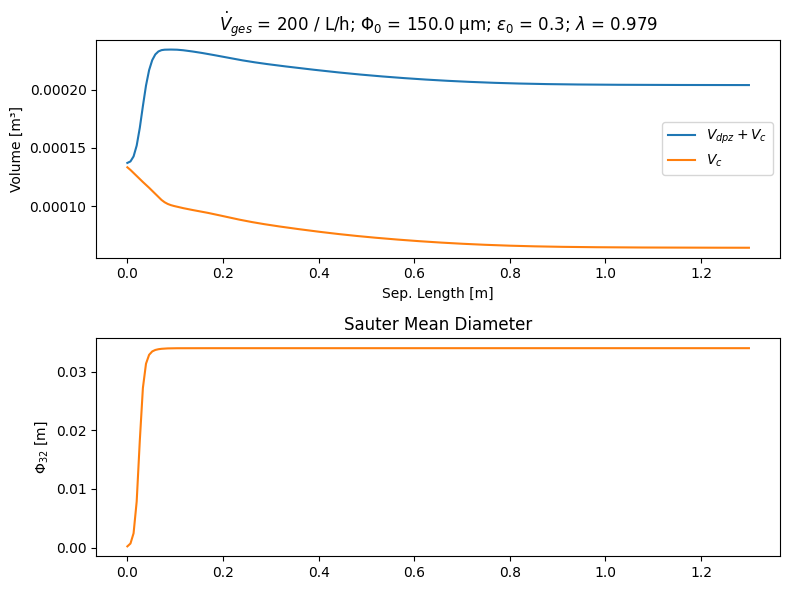

In [36]:
# vector x
dV_ges = 200
eps_0 = 0.3
phi_0 = 150e-6
_, _, d_j, _ = fun.initialize_boundary_conditions(eps_0, phi_0, 2.5*phi_0, 'Output', N_D=20, plot=False)


x_line = np.linspace(0.0, 1.3, 201)
Y_list = hf_PINN.predict_outputs_np(pinn.model, dV_ges=dV_ges, eps_0=eps_0, phi_0=phi_0, x=x_line, X_min=pinn.X_min, X_max=pinn.X_max, Y_min=pinn.Y_min, Y_max=pinn.Y_max)
Y_list = np.array(Y_list)

phi_32_x = Y_list[:,2]
V_c_x = Y_list[:,1]
V_dpz_x = Y_list[:,0] 
N_j = Y_list[:,3:] 
lam = hf.calc_efficiency(d_j, N_j)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))  # eine Zeile, zwei Spalten

# --- Subplot 1 ---
ax1.plot(x_line, V_c_x + V_dpz_x, label=r'$V_{dpz}+V_{c}$')
ax1.plot(x_line, V_c_x, label=r'$V_c$')
ax1.set_ylabel('Volume [m³]')
ax1.set_title(rf'$\dot{{V}}_{{ges}}$ = {dV_ges} / L/h; ' 
              rf'$\Phi_0$ = {1e6*phi_0} µm; ' 
              rf'$\epsilon_0$ = {eps_0}; '  
              rf'$\lambda$ = {lam:.3f}')
ax1.legend()

# --- Subplot 2 ---
ax2.plot(x_line, phi_32_x, color='tab:orange')
ax2.set_ylabel(r'$\Phi_{32}$ [m]')
ax1.set_xlabel('Sep. Length [m]')
ax2.set_title('Sauter Mean Diameter')

plt.tight_layout()
plt.show()